<a href="https://colab.research.google.com/github/xakaniniwe/BookStore/blob/main/MNIST_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.9006 - loss: 0.3257 - val_accuracy: 0.9838 - val_loss: 0.0527
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9849 - loss: 0.0497 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9907 - val_loss: 0.0326
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9907 - val_loss: 0.0328
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9913 - val_loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9878 - loss: 0.0381
Test Accuracy: 0.9907000064849854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


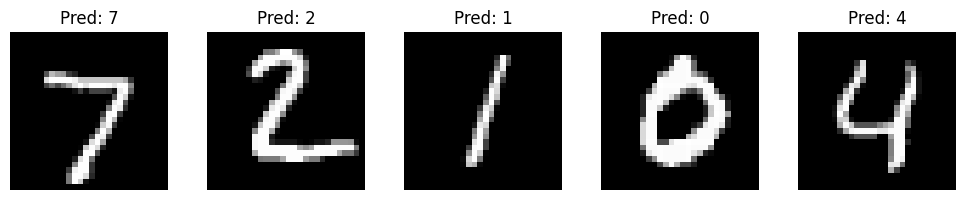

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add channel (for CNN)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# Predict on 5 images
sample_images = X_test[:5]
predictions = model.predict(sample_images)

# Plot
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
